# Initial Setups

## autoreload

In [1]:
%load_ext autoreload
%autoreload 2

## dir setup

In [2]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [3]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
interim_data_dir = os.path.join(project_dir, os.environ.get("INTERIM_DATA_DIR"))
wordvecs_data_dir = os.path.join(project_dir, os.environ.get("WORDVECS_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))
models_dir = os.path.join(project_dir, os.environ.get("MODELS_DIR"))

## imports

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
# import sweetviz as sv
# import utils

In [5]:
pd.set_option('max_rows', 200)
pd.set_option('max_columns', None)

In [6]:
from tqdm import tqdm
tqdm.pandas()

/Users/hitoshinagano/.virtualenvs/tensorflow2/lib/python3.7/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## project imports

In [7]:
import sys
sys.path.insert(0, '..')

from src.features import *
from src.models import *

### reading item_domain

In [8]:
item_domain_fn = 'item_domain.pkl'
item_domain_fp = os.path.join(processed_data_dir, item_domain_fn)
item_domain = pd.read_pickle(item_domain_fp)

In [9]:
item_domain

,item_id,domain_id
0,111260,MLM-INDIVIDUAL_HOUSES_FOR_SALE
1,871377,MLM-VIDEO_GAMES
2,490232,MLM-SKIRTS
3,1150706,MLM-GRAPHICS_CARDS
4,934912,MLM-NOTEBOOKS
...,...,...
2102272,1099649,MLB-BABY_STROLLERS
2102273,1482187,MLB-KITCHEN_SUPPLIES
2102274,1118904,MLB-SOCKS
2102275,237229,MLB-DISPOSABLE_BABY_DIAPERS


## test_dataset.jl.gz

In [10]:
%%time
test = read_raw_save_processed('test_dataset.jl.gz', 'test_dataset.pkl')

CPU times: user 1.24 s, sys: 512 ms, total: 1.76 s
Wall time: 1.92 s


### submissions check

In [10]:
pred_10_fn = 'pred_9_implicit_with_zeroview_search.csv'
pred_10_fp = os.path.join(reports_dir, pred_10_fn)
pred_10 = pd.read_csv(pred_10_fp, header = None)

pred_10.columns = [str(c) for c in pred_10.columns]

In [11]:
for c in range(10):
    pred_10[str(c) + '_domain'] = pd.merge(pred_10, item_domain, how = 'left', left_on = str(c), right_on = 'item_id')['domain_id']
    pred_10[str(c) + '_MLX'] = pred_10[str(c) + '_domain'].str[:3]

In [12]:
pred_10_domains = pred_10.filter(like = 'MLX').replace({'MLB': 1, 'MLM': 0})

In [13]:
pred_10 = pd.concat([pred_10, pred_10_domains.sum(axis = 1)], axis = 1)

In [14]:
pred_10[pred_10[0].isin(range(1, 10))].sample(10)

,0,1,2,3,4,5,6,7,8,9,0_domain,0_MLX,1_domain,1_MLX,2_domain,2_MLX,3_domain,3_MLX,4_domain,4_MLX,5_domain,5_MLX,6_domain,6_MLX,7_domain,7_MLX,8_domain,8_MLX,9_domain,9_MLX,0
101165,130052,1246784,304701,686743,1641816,1490977,236068,1249194,1127287,1973292,MLB-VACUUM_PUMPS,MLB,MLB-VACUUM_PUMPS,MLB,MLB-LADDERS,MLB,MLB-LADDERS,MLB,MLB-LADDERS,MLB,MLB-WRENCH_SETS,MLB,None,None,MLB-CLASSIC_CARS,MLB,MLB-LADDERS,MLB,MLB-LADDERS,MLB,9.0
15580,1525110,348656,618210,670570,303802,1626342,1636008,1046150,1577595,248709,MLB-MANUAL_DRINKING_WATER_PUMPS,MLB,MLB-MANUAL_DRINKING_WATER_PUMPS,MLB,MLB-MANUAL_DRINKING_WATER_PUMPS,MLB,MLB-FOOSBALL_TABLES,MLB,MLB-FOOSBALL_TABLES,MLB,MLB-MANUAL_DRINKING_WATER_PUMPS,MLB,None,None,MLB-FOOSBALL_TABLES,MLB,MLB-TV_RECEIVERS_AND_DECODERS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,9.0
77597,144698,988619,1242225,1068593,362966,1006558,578854,1082246,651106,1259130,MLB-VEHICLE_WAXES,MLB,MLB-EXERCISE_MATS,MLB,MLB-CELLPHONES,MLB,MLB-KITCHEN_COOKWARE_SETS,MLB,MLB-PANTS,MLB,MLB-VIDEO_GAMES,MLB,MLM-GYMNASTIC_KNEE_PADS,MLM,MLB-HARD_DRIVES_AND_SSDS,MLB,MLB-CELLPHONES,MLB,MLB-RABBIT_AND_RODENT_CAGES,MLB,9.0
38494,926273,1199046,1009405,1413932,735072,1260804,1758414,579083,1475098,1722006,MLB-ROUTERS_AND_WIRELESS_SYSTEMS,MLB,MLB-ROUTERS_AND_WIRELESS_SYSTEMS,MLB,MLB-ROUTERS_AND_WIRELESS_SYSTEMS,MLB,MLB-ROUTERS_AND_WIRELESS_SYSTEMS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,MLB-ROUTERS,MLB,MLB-HOME_MANUAL_KNIFE_SHARPENERS,MLB,None,None,MLB-ROUTERS,MLB,MLB-ELECTRONIC_PRODUCTS,MLB,9.0
129395,1724937,841571,183864,245182,386598,191770,1500664,316371,1887769,180470,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-INFRARED_THERMOMETERS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,None,None,MLB-ELECTRONIC_ACCESSORIES_AND_SPARE_PARTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,MLB-UNCLASSIFIED_PRODUCTS,MLB,9.0
88119,495609,1554173,1651549,910024,561307,1211424,1411497,1352709,466082,2095359,MLM-AUTOMOBILE_FUEL_PUMPS,MLM,MLM-VEHICLE_PARTS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLM-FUEL_LEVEL_FLOATS,MLM,MLB-VIDEO_GAME_PREPAID_CARDS,MLB,1.0
54545,1475314,1612632,1652314,654274,1909158,353395,849618,77562,20292,1553366,MLB-SNEAKERS,MLB,MLB-NON_CORRECTIVE_CONTACT_LENSES,MLB,MLB-LOAFERS_AND_OXFORDS,MLB,MLB-NON_CORRECTIVE_CONTACT_LENSES,MLB,MLB-NON_CORRECTIVE_CONTACT_LENSES,MLB,None,None,MLB-VIDEO_GAMES,MLB,None,None,MLB-PERFUMES,MLB,MLB-LOAFERS_AND_OXFORDS,MLB,8.0
52825,2075181,2060570,88783,666423,664532,1974047,123601,1330579,1832485,1877777,MLB-ANIMAL_AND_PET_PRODUCTS,MLB,MLB-NOTEBOOK_CASES,MLB,MLB-BEARD_OILS_AND_BALMS,MLB,MLB-HAIR_TREATMENTS,MLB,None,None,MLB-BEAUTY_AND_PERSONAL_CARE_SUPPLIES,MLB,MLB-BEARD_OILS_AND_BALMS,MLB,MLB-BEARD_OILS_AND_BALMS,MLB,MLB-BEARD_OILS_AND_BALMS,MLB,MLB-BEARD_OILS_AND_BALMS,MLB,9.0
4702,487274,1046680,1158256,657419,523364,353891,1465246,1825805,608670,189033,MLB-ADHESIVE_TAPES,MLB,MLB-AUTOMOTIVE_TIRES,MLB,MLB-FLOOD_LIGHTS,MLB,MLB-BOOTS_AND_BOOTIES,MLB,MLB-AIR_CONDITIONERS,MLB,MLB-WALL_AND_CEILING_LIGHTS,MLB,MLB-WATER_TANKS,MLB,MLM-LAPTOP_CHARGERS,MLM,MLB-PANTS,MLB,MLB-SNEAKERS,MLB,9.0
17168,657419,1256104,1410997,1406581,904060,1210615,1299867,1920906,72113,1607747,MLB-BOOTS_AND_BOOTIES,MLB,MLB-BOOTS_AND_BOOTIES,MLB,MLB-VIDEO_GAMES,MLB,MLB-AUTOMOTIVE_CELLPHONE_AND_GPS_MOUNTS,MLB,MLB-PENCIL_CASES,MLB,MLB-CELLPHONE_COVERS,MLB,MLM-SNEAKERS,MLM,MLB-CELLPHONES,MLB,MLB-FANS,MLB,MLB-SPEAKERS,MLB,9.0


In [15]:
pred_10.rename(columns = {0: 'MLX_sum'}, inplace = True)

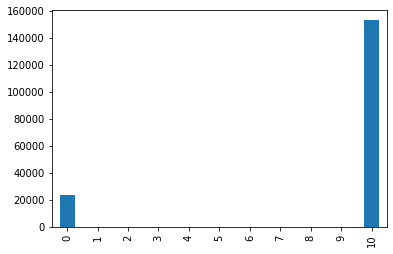

In [16]:
pred_10.MLX_sum.value_counts().reindex(range(11)).plot(kind = 'bar', logy = False);

In [17]:
pred_10_domains = pred_10.filter(like = 'domain')

In [18]:
pred_10_domains = pred_10_domains.fillna('NONE')

In [19]:
pred_10['unique_domains'] = pred_10_domains.apply(lambda x: np.unique(x, return_counts = True), axis = 1)

In [20]:
pred_10['len_unique_domains'] = pred_10.unique_domains.str[0].str.len()

In [21]:
pred_10['len_domain_mode_freq'] = pred_10.unique_domains.str[1].apply(max)

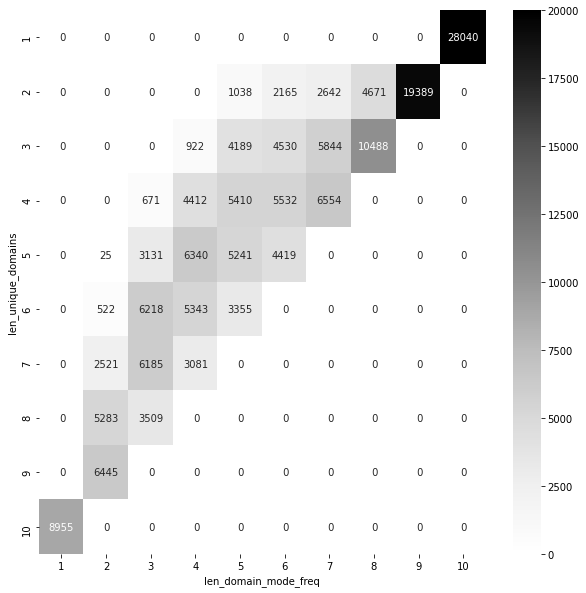

In [22]:
plt.figure(figsize = (10, 10))
sns.heatmap(pd.crosstab(index = pred_10.len_unique_domains, columns = pred_10.len_domain_mode_freq), cmap = 'Greys', vmax = 20000, annot = True, fmt = '2');